# **1. Project Scenario**

"CityBike Systems" is facing a problem: In some stations, bikes run out during rush hour, while in others, they sit unused.
Your manager wants a data-driven solution. You need to build a model that predicts **how many bikes will be rented at any given hour** based on:

* Weather conditions (Temperature, Rain, Humidity).
* Time factors (Hour of day, Season, Holiday or Working Day).

# **2. Dataset**

* **Source:** UCI Machine Learning Repository / Kaggle.
* **Dataset Name:** [Seoul Bike Sharing Demand Dataset](https://www.kaggle.com/datasets/saurabhshahane/seoul-bike-sharing-demand-prediction)
* **Target Variable:** `Rented Bike Count`


# **3. Step-by-Step Requirements**

# Imports & Setup

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings('ignore')

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# **Phase 1: Data Engineering & Preprocessing (The Heavy Lifting)**

* **Load & Rename:** Load the dataset. The column names are messy (e.g., `Temperature(°C)`). Rename them to clean identifiers (e.g., `Temperature`, `Humidity`, `Solar_Rad`).
* **Date Manipulation (Crucial):**
1. The dataset has a `Date` column (String format).
2. Convert it to `datetime` objects.
3. **Feature Extraction:** Create new columns from the Date:
 `Month` `Day` `Weekday` (Mon, Tue, Wed...)
4. **Categorical Encoding:**
* Convert `Seasons`, `Holiday`, and `Functioning Day` into numerical values using One-Hot Encoding (`pd.get_dummies`) or Label Encoding.

In [45]:
from google.colab import files
uploaded = files.upload()

Saving SeoulBikeData.csv to SeoulBikeData (1).csv


In [46]:
df = pd.read_csv('SeoulBikeData.csv', encoding='unicode_escape')

In [47]:
df.shape

(8760, 14)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [50]:
df.columns = df.columns.str.strip()
df.columns = df.columns.str.replace(' ', '_')
df.columns = df.columns.str.replace('(°C)', '', regex=False)
df.columns = df.columns.str.replace('(%)', '', regex=False)
df.columns = df.columns.str.replace('(m/s)', '', regex=False)
df.columns = df.columns.str.replace('(10m)', '', regex=False)
df.columns = df.columns.str.replace('(MJ/m2)', '', regex=False)
df.columns = df.columns.str.replace('(mm)', '', regex=False)
df.columns = df.columns.str.replace('(cm)', '', regex=False)

In [51]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

In [52]:
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Weekday'] = df['Date'].dt.day_name()

In [53]:
df = pd.get_dummies(df, columns=['Seasons', 'Holiday', 'Functioning_Day'], drop_first=True)

In [54]:
df.head()

,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed_,Visibility_,Dew_point_temperature,Solar_Radiation_,Rainfall,Snowfall_,Month,Day,Weekday,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning_Day_Yes
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,12,1,Friday,False,False,True,True,True
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,12,1,Friday,False,False,True,True,True
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,12,1,Friday,False,False,True,True,True
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,12,1,Friday,False,False,True,True,True
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,12,1,Friday,False,False,True,True,True


# **Phase 2: Exploratory Data Analysis (EDA) - "The Business Report"**

* *Answering Management Questions with Visuals:*
1. **Hourly Trend:** Plot a Line Chart of `Rented Bike Count` vs. `Hour`. *Identify the two peak "Rush Hours".*
2. **Weather Impact:** Use a Scatter Plot or Box Plot to show the relation between `Temperature` and `Bike Count`. *Do people rent bikes when it's freezing?*
3. **Seasonal Pattern:** Which season has the highest demand? (Bar Chart).
4. **Correlation Matrix:** Use a Heatmap to see which columns correlate most with the `Bike Count`.

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

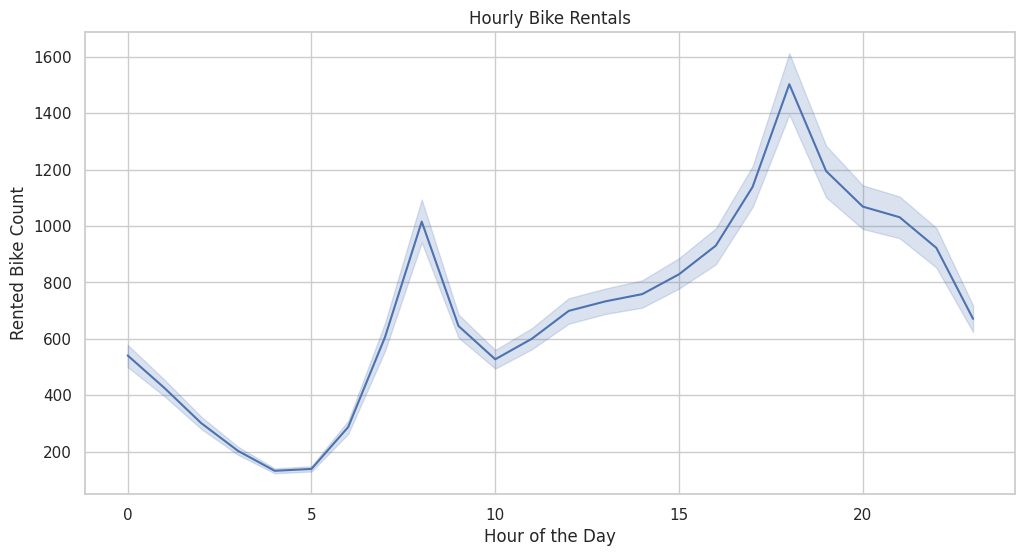

In [56]:

sns.lineplot(data=df, x='Hour', y='Rented_Bike_Count')
plt.title('Hourly Bike Rentals')
plt.xlabel('Hour of the Day')
plt.ylabel('Rented Bike Count')
plt.show()

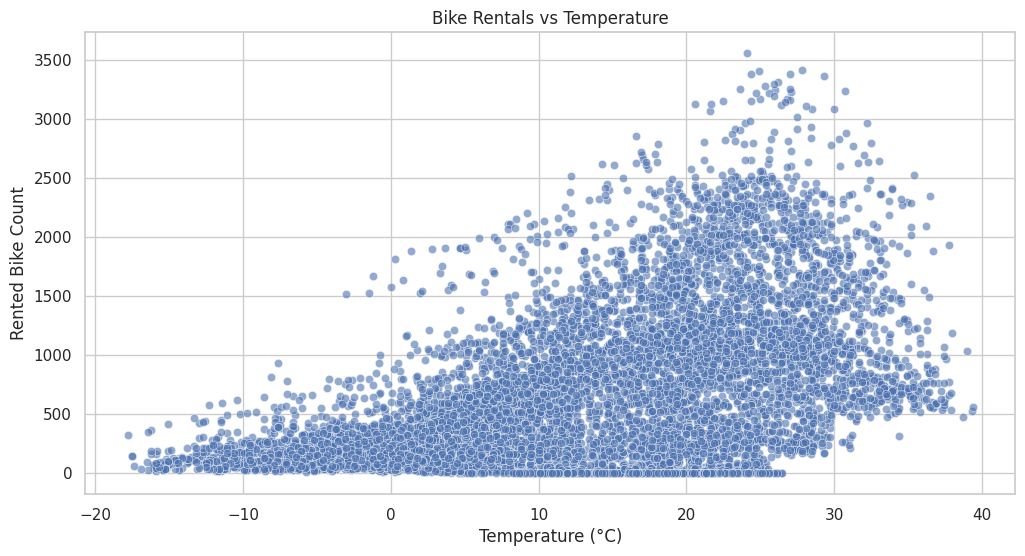

In [57]:
sns.scatterplot(data=df, x='Temperature', y='Rented_Bike_Count', alpha=0.6)
plt.title('Bike Rentals vs Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Rented Bike Count')
plt.show()

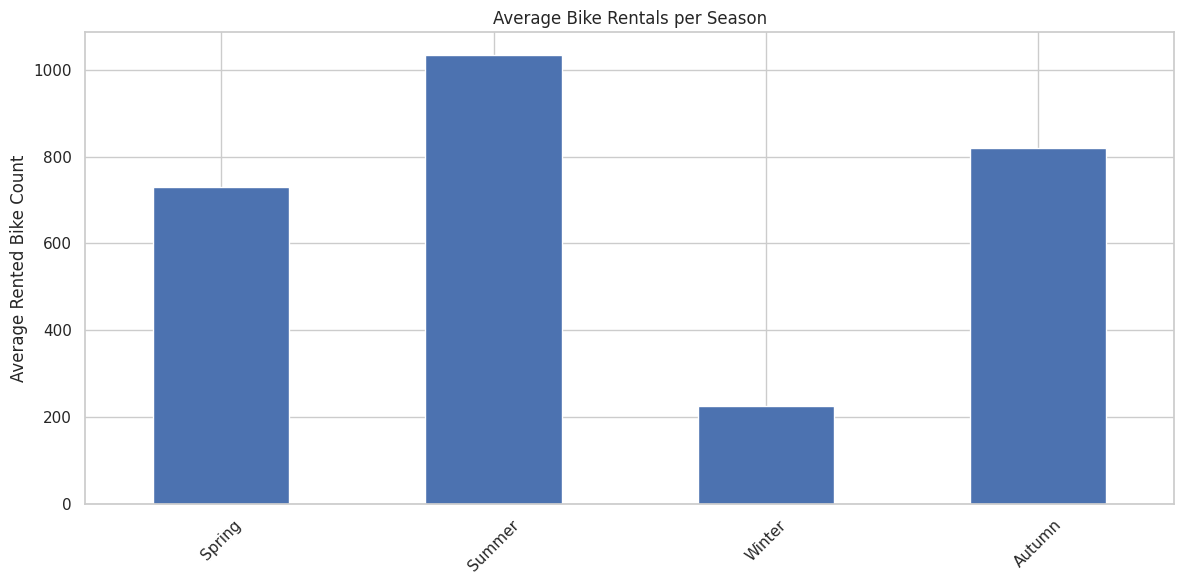

In [58]:
season_avg_data = {
    'Spring': df[df['Seasons_Spring'] == True]['Rented_Bike_Count'].mean(),
    'Summer': df[df['Seasons_Summer'] == True]['Rented_Bike_Count'].mean(),
    'Winter': df[df['Seasons_Winter'] == True]['Rented_Bike_Count'].mean(),
    'Autumn': df[(df['Seasons_Spring'] == False) & (df['Seasons_Summer'] == False) & (df['Seasons_Winter'] == False)]['Rented_Bike_Count'].mean()
}

season_avg = pd.Series(season_avg_data)
season_avg.plot(kind='bar')
plt.title('Average Bike Rentals per Season')
plt.ylabel('Average Rented Bike Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

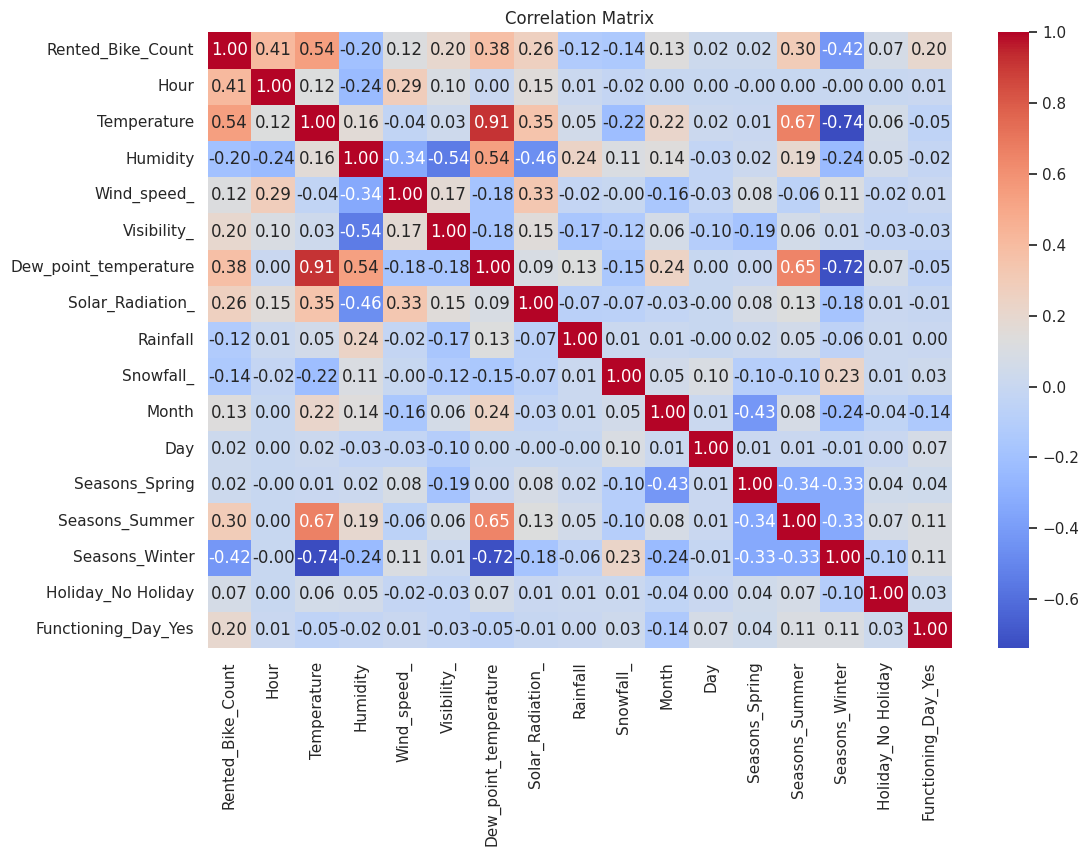

In [59]:
plt.figure(figsize=(12,8))
df_numeric = df.drop(columns=['Date', 'Weekday'], errors='ignore')
corr = df_numeric.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# **Phase 3: Advanced Feature Engineering**

* **Binning:** Create a new column called `Day_Type`:
* If it's a Weekend or Holiday -> 'Leisure'
* If it's a Working Day -> 'Work'
* **Drop Redundant Columns:** Drop the original `Date` column and any columns with extremely low correlation (e.g., if `Dew point temperature` is too similar to `Temperature`, drop one to avoid multicollinearity).

In [60]:
df['Day_Type'] = 'Work'
df.loc[(df['Holiday_No Holiday'] == False) | (df['Weekday'].isin(['Saturday', 'Sunday'])), 'Day_Type'] = 'Leisure'

In [61]:
df = pd.get_dummies(df, columns=['Day_Type'], drop_first=True)

In [62]:
df = df.drop(columns=['Date', 'Dew_point_temperature', 'Snowfall_'])

In [63]:
df.head()

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed_,Visibility_,Solar_Radiation_,Rainfall,Month,Day,Weekday,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning_Day_Yes,Day_Type_Work
0,254,0,-5.2,37,2.2,2000,0.0,0.0,12,1,Friday,False,False,True,True,True,True
1,204,1,-5.5,38,0.8,2000,0.0,0.0,12,1,Friday,False,False,True,True,True,True
2,173,2,-6.0,39,1.0,2000,0.0,0.0,12,1,Friday,False,False,True,True,True,True
3,107,3,-6.2,40,0.9,2000,0.0,0.0,12,1,Friday,False,False,True,True,True,True
4,78,4,-6.0,36,2.3,2000,0.0,0.0,12,1,Friday,False,False,True,True,True,True


# **Phase 4: Machine Learning (Model Training & Comparison)**

* **Split Data:** Split your dataset into **75% Training** and **25% Testing** sets.
1. **Model 1: Linear Regression**
* Initialize and train a `LinearRegression` model.
* **Coefficients Analysis:** Print the coefficients (`model.coef_`).
* *Question:* Which feature has the highest positive impact on demand?

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

In [65]:

X = df.drop('Rented_Bike_Count', axis=1)
y = df['Rented_Bike_Count']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [66]:

df_processed = df.copy()
df_processed = pd.get_dummies(df_processed, columns=['Weekday'], drop_first=True)

X = df_processed.drop('Rented_Bike_Count', axis=1)
y = df_processed['Rented_Bike_Count']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

print("Linear Regression R2:", r2_score(y_test, y_pred_lr))
print("Linear Regression RMSE:",
      np.sqrt(mean_squared_error(y_test, y_pred_lr)))
coeff_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': lr_model.coef_})
coeff_df = coeff_df.sort_values(by='Coefficient', ascending=False)
print("\nLinear Regression Coefficients:")
print(coeff_df)

Linear Regression R2: 0.5372234576957202
Linear Regression RMSE: 435.1650446784062

Linear Regression Coefficients:
                Feature  Coefficient
13  Functioning_Day_Yes   972.600713
12   Holiday_No Holiday    82.973544
14        Day_Type_Work    51.088214
0                  Hour    28.612991
1           Temperature    26.422666
3           Wind_speed_    17.544386
7                 Month     3.823579
20    Weekday_Wednesday     0.799621
16     Weekday_Saturday     0.610622
4           Visibility_     0.003181
8                   Day    -1.028893
2              Humidity    -7.920159
18     Weekday_Thursday    -8.448218
19      Weekday_Tuesday   -11.259727
15       Weekday_Monday   -48.687502
6              Rainfall   -70.612266
17       Weekday_Sunday   -77.274071
5      Solar_Radiation_   -80.534644
9        Seasons_Spring  -126.287372
10       Seasons_Summer  -150.256268
11       Seasons_Winter  -345.241243


In [67]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("\nRandom Forest R2:", r2_score(y_test, y_pred_rf))
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))

feat_imp = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
feat_imp = feat_imp.sort_values(by='Importance', ascending=False)
print("\nRandom Forest Feature Importance:")
print(feat_imp)


Random Forest R2: 0.9304090501346339
Random Forest RMSE: 168.75036327753895

Random Forest Feature Importance:
                Feature  Importance
1           Temperature    0.305117
0                  Hour    0.290620
13  Functioning_Day_Yes    0.089821
5      Solar_Radiation_    0.087093
2              Humidity    0.075849
6              Rainfall    0.037997
14        Day_Type_Work    0.034196
11       Seasons_Winter    0.021325
7                 Month    0.019610
8                   Day    0.009393
4           Visibility_    0.008922
3           Wind_speed_    0.008822
15       Weekday_Monday    0.001977
20    Weekday_Wednesday    0.001721
17       Weekday_Sunday    0.001529
10       Seasons_Summer    0.001282
16     Weekday_Saturday    0.001273
9        Seasons_Spring    0.001186
18     Weekday_Thursday    0.000881
19      Weekday_Tuesday    0.000825
12   Holiday_No Holiday    0.000560


2. **Model 2: Random Forest Regressor (The Challenger)**
* Initialize and train a `RandomForestRegressor` (suggested: `n_estimators=100`).
* **Feature Importance:** Plot or print the `feature_importances_` of the Random Forest model.
* *Question:* Does Random Forest agree with Linear Regression on the most important features?

In [68]:
from sklearn.ensemble import RandomForestRegressor

In [69]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Random Forest R2:", r2_score(y_test, y_pred_rf))
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))

Random Forest R2: 0.9304090501346339
Random Forest RMSE: 168.75036327753895


In [71]:
importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

In [72]:
print(importances)

                Feature  Importance
1           Temperature    0.305117
0                  Hour    0.290620
13  Functioning_Day_Yes    0.089821
5      Solar_Radiation_    0.087093
2              Humidity    0.075849
6              Rainfall    0.037997
14        Day_Type_Work    0.034196
11       Seasons_Winter    0.021325
7                 Month    0.019610
8                   Day    0.009393
4           Visibility_    0.008922
3           Wind_speed_    0.008822
15       Weekday_Monday    0.001977
20    Weekday_Wednesday    0.001721
17       Weekday_Sunday    0.001529
10       Seasons_Summer    0.001282
16     Weekday_Saturday    0.001273
9        Seasons_Spring    0.001186
18     Weekday_Thursday    0.000881
19      Weekday_Tuesday    0.000825
12   Holiday_No Holiday    0.000560


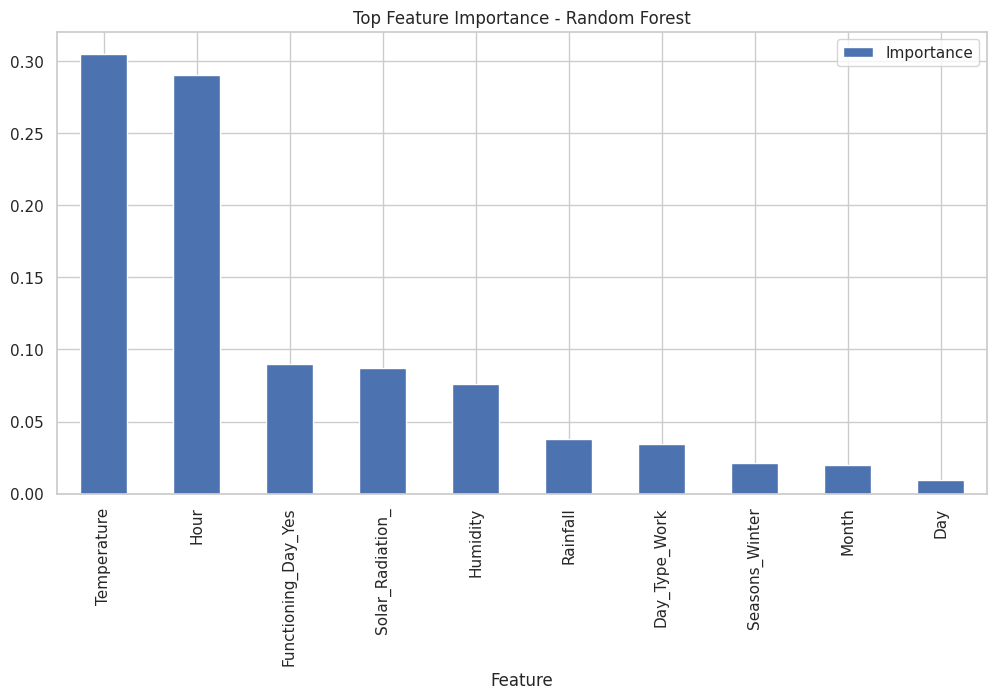

In [75]:
importances.head(10).plot(kind='bar', x='Feature', y='Importance')
plt.title("Top Feature Importance - Random Forest")
plt.show()

In [ ]:
Random Forest performed better than Linear Regression. This means the relationship between the features and bike rentals is not purely linear.

# **Phase 5: Evaluation & Final Submission**

1. **Performance Metrics:**
* Calculate **RMSE** (Root Mean Squared Error) and **R2 Score** for **BOTH** models.
* **Comparison:** Create a small table or print statement comparing the results.
* *Example:* "Linear Regression R2: 0.55 | Random Forest R2: 0.82"
* *Question:* Which model is better? Why do you think that is?

In [76]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import pandas as pd

In [77]:
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

In [78]:
print(f"Linear Regression R2: {r2_lr:.2f} | RMSE: {rmse_lr:.2f}")
print(f"Random Forest R2: {r2_rf:.2f} | RMSE: {rmse_rf:.2f}")

Linear Regression R2: 0.54 | RMSE: 435.17
Random Forest R2: 0.93 | RMSE: 168.75


In [ ]:
Random Forest performed better than Linear Regression. Linear Regression gave R² = 0.54 and RMSE ≈ 435, while Random Forest gave R² = 0.93 and RMSE ≈ 169. This shows that Random Forest provides more accurate predictions because it can capture the complex, non-linear relationships between time, weather conditions, and bike rental demand, whereas Linear Regression assumes a linear relationship.

# **The "Real World" Test (Simulation):**

* Create a specific DataFrame for a hypothetical scenario:
* *Scenario:* It's a **Monday** in **Summer**, **8:00 AM**, **25°C**, **No Rain**.
* *(Note: Monday is a 'Work' day, Summer is 'Seasons_Summer' = 1)*


* **Task:** Use **BOTH** models to predict the demand for this specific hour.
* **Comparison:** Compare the two predicted numbers. Which one feels more realistic based on your analysis?

Run Below Cells as it to generate sample data to test with

In [79]:
scenario_data = {col: 0 for col in X.columns}

In [80]:
scenario_data['Hour'] = 8
scenario_data['Temperature'] = 25
scenario_data['Humidity'] = 60
scenario_data['Wind_Speed'] = 1.5
scenario_data['Visibility'] = 1500
scenario_data['Solar_Radiation'] = 0.5
scenario_data['Seasons_Summer'] = 1
scenario_data['Day_Type_Work'] = 1
scenario_data['Functioning_Day_Yes'] = 1

In [81]:
scenario_df = pd.DataFrame([scenario_data])

In [85]:

expected_columns = X.columns.tolist()

col_name_mapping = {
    'Wind_Speed': 'Wind_speed_',
    'Visibility': 'Visibility_',
    'Solar_Radiation': 'Solar_Radiation_'
}

for old_name, new_name in col_name_mapping.items():
    if old_name in scenario_df.columns and new_name in scenario_df.columns:
        scenario_df[new_name] = scenario_df[old_name].iloc[0]
        scenario_df = scenario_df.drop(columns=[old_name])
    elif old_name in scenario_df.columns and new_name not in scenario_df.columns:

        scenario_df = scenario_df.rename(columns={old_name: new_name})


scenario_df = scenario_df.reindex(columns=expected_columns, fill_value=0)

prediction = lr_model.predict(scenario_df)
prediction_rf = rf_model.predict(scenario_df)

In [86]:
print(f"\n--- Real World Prediction Comparison ---")
print(f"Conditions: Summer Monday, 8:00 AM, 25C")
print(f"Linear Regression Prediction: {int(prediction[0])} bikes")
print(f"Random Forest Prediction:     {int(prediction_rf[0])} bikes")


--- Real World Prediction Comparison ---
Conditions: Summer Monday, 8:00 AM, 25C
Linear Regression Prediction: 907 bikes
Random Forest Prediction:     1968 bikes
